# Import Liabraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Acquiring Dataset

In [4]:
data_customers=pd.read_csv('customers.csv')
data_creditApplication=pd.read_csv('credit_applications.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'customers.csv'

the below code is just merge both of the datasets

In [ ]:
merged_loan_record = pd.merge(data_customers, data_creditApplication, on=['client_nr'], how='left')

merged_loan_record.head()

,Unnamed: 0_x,client_nr,yearmonth_x,total_nr_trx,nr_debit_trx,volume_debit_trx,nr_credit_trx,volume_credit_trx,min_balance,max_balance,CRG,Unnamed: 0_y,yearmonth_y,credit_application,nr_credit_applications
0,1,1,201401,97,50,6527929,47,7454863,-7914288,25110651,1.0,1,201401,0,0
1,1,1,201401,97,50,6527929,47,7454863,-7914288,25110651,1.0,2,201402,0,0
2,1,1,201401,97,50,6527929,47,7454863,-7914288,25110651,1.0,3,201403,0,0
3,1,1,201401,97,50,6527929,47,7454863,-7914288,25110651,1.0,4,201404,0,0
4,1,1,201401,97,50,6527929,47,7454863,-7914288,25110651,1.0,5,201405,0,0


in below cell we are checking how many number of rows and columns in dataset

In [ ]:
merged_loan_record.shape

(939692, 15)

in below cell we are checking about each attribute datatype

In [ ]:
merged_loan_record.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 939692 entries, 0 to 939691
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0_x            939692 non-null  int64  
 1   client_nr               939692 non-null  int64  
 2   yearmonth_x             939692 non-null  int64  
 3   total_nr_trx            939692 non-null  int64  
 4   nr_debit_trx            939692 non-null  int64  
 5   volume_debit_trx        939692 non-null  int64  
 6   nr_credit_trx           939692 non-null  int64  
 7   volume_credit_trx       939692 non-null  int64  
 8   min_balance             939692 non-null  int64  
 9   max_balance             939692 non-null  int64  
 10  CRG                     768517 non-null  float64
 11  Unnamed: 0_y            939692 non-null  int64  
 12  yearmonth_y             939692 non-null  int64  
 13  credit_application      939692 non-null  int64  
 14  nr_credit_applicatio

plot the correlation map

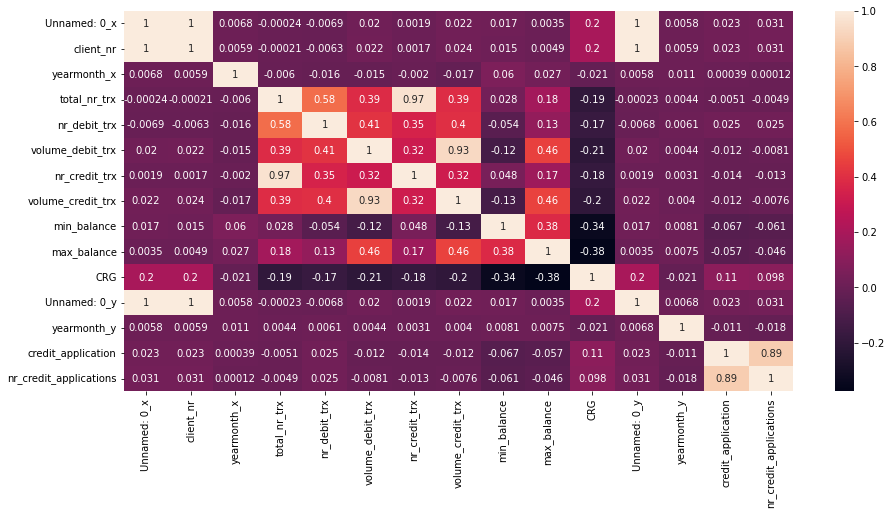

In [ ]:
plt.figure(figsize=[15,7])
sns.heatmap(merged_loan_record.corr(),annot=True)
plt.show()

## Q1)

A positive corelation between both the variables is  number of credit transaction, total number of transaction present number. Similarly total number of transaction have greater impact on number of credit transactions. moreover, volume of debit transaction and volume credit transaction. which reports that higher number of credit volume higher will be the credit transaction. Number of Credit applications have significant relationship with number of credit application.


## Q2)

Here we get the only the clients with loan application and find the average and median for that clients.
by doing describe().transpose() we get mean and average

In [ ]:
d=merged_loan_record[merged_loan_record['credit_application']==1]
d[(d['min_balance']<1) & (d['max_balance']<1)].describe().transpose()[['mean','50%']]

,mean,50%
Unnamed: 0_x,1.521077e+04,15971.0
client_nr,4.870036e+02,512.0
yearmonth_x,2.014898e+05,201504.0
total_nr_trx,1.247315e+02,109.0
nr_debit_trx,6.627346e+01,59.0
volume_debit_trx,6.290153e+06,4720706.0
nr_credit_trx,5.845806e+01,47.0
volume_credit_trx,6.334748e+06,4762464.0
min_balance,-9.710203e+06,-7305665.0
max_balance,-6.477774e+06,-4356809.0


In [ ]:
d[(d['min_balance']>0) & (d['max_balance']>0)].describe().transpose()[['mean','50%']]

,mean,50%
Unnamed: 0_x,1.579042e+04,16842.0
client_nr,5.073183e+02,540.0
yearmonth_x,2.015045e+05,201507.0
total_nr_trx,1.455071e+02,119.0
nr_debit_trx,7.363150e+01,65.0
volume_debit_trx,1.015631e+07,7029553.5
nr_credit_trx,7.187560e+01,47.0
volume_credit_trx,1.025069e+07,7073078.0
min_balance,1.524821e+06,252885.0
max_balance,8.467257e+06,5167909.0


here im just getting the balance which is less than 0 because we want 1% interest rate for flexible balance

In [ ]:
flexible_balance=(merged_loan_record[(merged_loan_record['min_balance']<0) & (merged_loan_record['max_balance']<0)])


in the below cell we are getting the average for flexible accounts

In [ ]:
flexible_balance['Per_Month_Revenue_Min_Balance']=np.mean(flexible_balance[(flexible_balance['min_balance']<0) & (flexible_balance['max_balance']<0)]['min_balance'].mean())

C:\Users\farha\AppData\Local\Temp/ipykernel_26144/2967484511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flexible_balance['Per_Month_Revenue_Min_Balance']=np.mean(flexible_balance[(flexible_balance['min_balance']<0) & (flexible_balance['max_balance']<0)]['min_balance'].mean())


## Q3

then at last multiple 30 of average value of interest because we want for each month that's why i multiplied by 30 to get month revenue.

In [ ]:
print('Revenues Per Month For Min_balance\n')

flexible_balance.groupby('yearmonth_x').sum()['Per_Month_Revenue_Min_Balance']*30

Revenues Per Month For Min_balance



yearmonth_x
201401   -2.578358e+12
201402   -3.000782e+12
201403   -3.037576e+12
201404   -2.810635e+12
201405   -3.016230e+12
201406   -2.793502e+12
201407   -2.550552e+12
201408   -2.824398e+12
201409   -2.773842e+12
201410   -2.706434e+12
201411   -2.976628e+12
201412   -2.669640e+12
201501   -2.491570e+12
201502   -2.829172e+12
201503   -2.768505e+12
201504   -2.581448e+12
201505   -2.721320e+12
201506   -2.593244e+12
201507   -2.353665e+12
201508   -2.597738e+12
201509   -2.619646e+12
201510   -2.540722e+12
201511   -2.614590e+12
201512   -2.545778e+12
201601   -2.403378e+12
201602   -2.613748e+12
201603   -2.539318e+12
201604   -2.432307e+12
201605   -2.536509e+12
201606   -2.331757e+12
201607   -2.255361e+12
201608   -2.337936e+12
Name: Per_Month_Revenue_Min_Balance, dtype: float64

In [ ]:
flexible_balance['Per_Month_Revenue_Max_Balance']=np.mean(flexible_balance[(flexible_balance['min_balance']<0) & (flexible_balance['max_balance']<0)]['max_balance'].mean())

C:\Users\farha\AppData\Local\Temp/ipykernel_26144/419080423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flexible_balance['Per_Month_Revenue_Max_Balance']=np.mean(flexible_balance[(flexible_balance['min_balance']<0) & (flexible_balance['max_balance']<0)]['max_balance'].mean())


In [ ]:
print('Revenues Per Month for max_balance\n')

flexible_balance.groupby('yearmonth_x').sum()['Per_Month_Revenue_Max_Balance']*30

Revenues Per Month for max_balance



yearmonth_x
201401   -1.798938e+12
201402   -2.093666e+12
201403   -2.119337e+12
201404   -1.960999e+12
201405   -2.104444e+12
201406   -1.949046e+12
201407   -1.779538e+12
201408   -1.970602e+12
201409   -1.935328e+12
201410   -1.888297e+12
201411   -2.076813e+12
201412   -1.862626e+12
201501   -1.738386e+12
201502   -1.973933e+12
201503   -1.931605e+12
201504   -1.801094e+12
201505   -1.898683e+12
201506   -1.809324e+12
201507   -1.642168e+12
201508   -1.812460e+12
201509   -1.827745e+12
201510   -1.772679e+12
201511   -1.824217e+12
201512   -1.776206e+12
201601   -1.676853e+12
201602   -1.823629e+12
201603   -1.771699e+12
201604   -1.697038e+12
201605   -1.769740e+12
201606   -1.626883e+12
201607   -1.573581e+12
201608   -1.631194e+12
Name: Per_Month_Revenue_Max_Balance, dtype: float64

## Q4

Hypothesis 1: There is likely to be a positive corelation between total number of transactions and total credit transaction.

Hypothesis 2: There is likely to be a positive corelation between volume of debit transaction and volume of credit transaction. 

And these variables i would need for testing

the below graph is just to plot the no of loan applications in all months

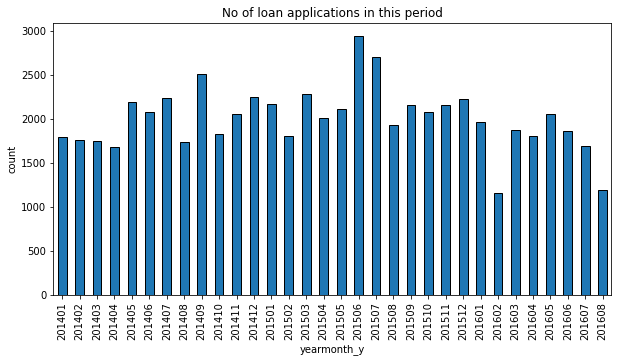

In [ ]:
plt.figure(figsize=[10,5])
merged_loan_record.groupby('yearmonth_y').sum()['credit_application'].plot(kind='bar',edgecolor='black')
plt.title('No of loan applications in this period')
plt.ylabel('count')
plt.show()

from the above graph we can see that in year 2015 and in 6 month we have got high number of loan applications.